In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import pandas as pd

# Load the data from CSV file
df = pd.read_csv("original_session_level_data.csv")

# Count session types for each class
session_counts = df.groupby(['class', 'class_session_type']).size().unstack(fill_value=0)

# Calculate the required sums
session_counts['total_classwork_indep'] = session_counts.get('classwork', 0) + session_counts.get('at school independent work', 0)
session_counts['homework_greater'] = session_counts.get('homework', 0) > session_counts['total_classwork_indep']

# Filter classes where homework > (classwork + at school indep)
result_classes = session_counts[session_counts['homework_greater']].index.tolist()

# Display results
print("Classes where homework count > (classwork + at school independent work):")
if len(result_classes) == 0: print("no such classes")
for class_id in result_classes:
    print(class_id)

# Optional: Display the counts for verification
print("\nSession type counts per class:")
print(session_counts[['classwork', 'at school independent work', 'homework', 'total_classwork_indep']])

Classes where homework count > (classwork + at school independent work):
no such classes

Session type counts per class:
class_session_type  classwork  at school independent work  homework  \
class                                                                 
c1                         59                         123         9   
c10                       694                         125        53   
c11                       373                          55        50   
c12                      1164                         115       141   
c13                       590                         292        86   
c14                       303                         191        11   
c15                       694                         210       103   
c2                       1224                         132       147   
c3                        549                         139         3   
c4                        161                          47        18   
c5                        9

/var/folders/bh/d4vzbc194yxb1c729qdk9r940000gn/T/ipykernel_56588/4141677618.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['session_label'] = filtered_df['class_session_type'].map(session_mapping)



Class c1 - Session Counts Outside 7AM-4PM:
Classwork: 0 sessions
Independent Study: 0 sessions

Class c10 - Session Counts Outside 7AM-4PM:
Classwork: 0 sessions
Independent Study: 14 sessions

Class c11 - Session Counts Outside 7AM-4PM:
Classwork: 0 sessions
Independent Study: 3 sessions

Class c12 - Session Counts Outside 7AM-4PM:
Classwork: 0 sessions
Independent Study: 16 sessions

Class c13 - Session Counts Outside 7AM-4PM:
Classwork: 0 sessions
Independent Study: 21 sessions

Class c14 - Session Counts Outside 7AM-4PM:
Classwork: 0 sessions
Independent Study: 13 sessions

Class c15 - Session Counts Outside 7AM-4PM:
Classwork: 0 sessions
Independent Study: 4 sessions

Class c2 - Session Counts Outside 7AM-4PM:
Classwork: 0 sessions
Independent Study: 19 sessions

Class c3 - Session Counts Outside 7AM-4PM:
Classwork: 0 sessions
Independent Study: 1 sessions

Class c4 - Session Counts Outside 7AM-4PM:
Classwork: 0 sessions
Independent Study: 0 sessions

Class c5 - Session Counts Ou

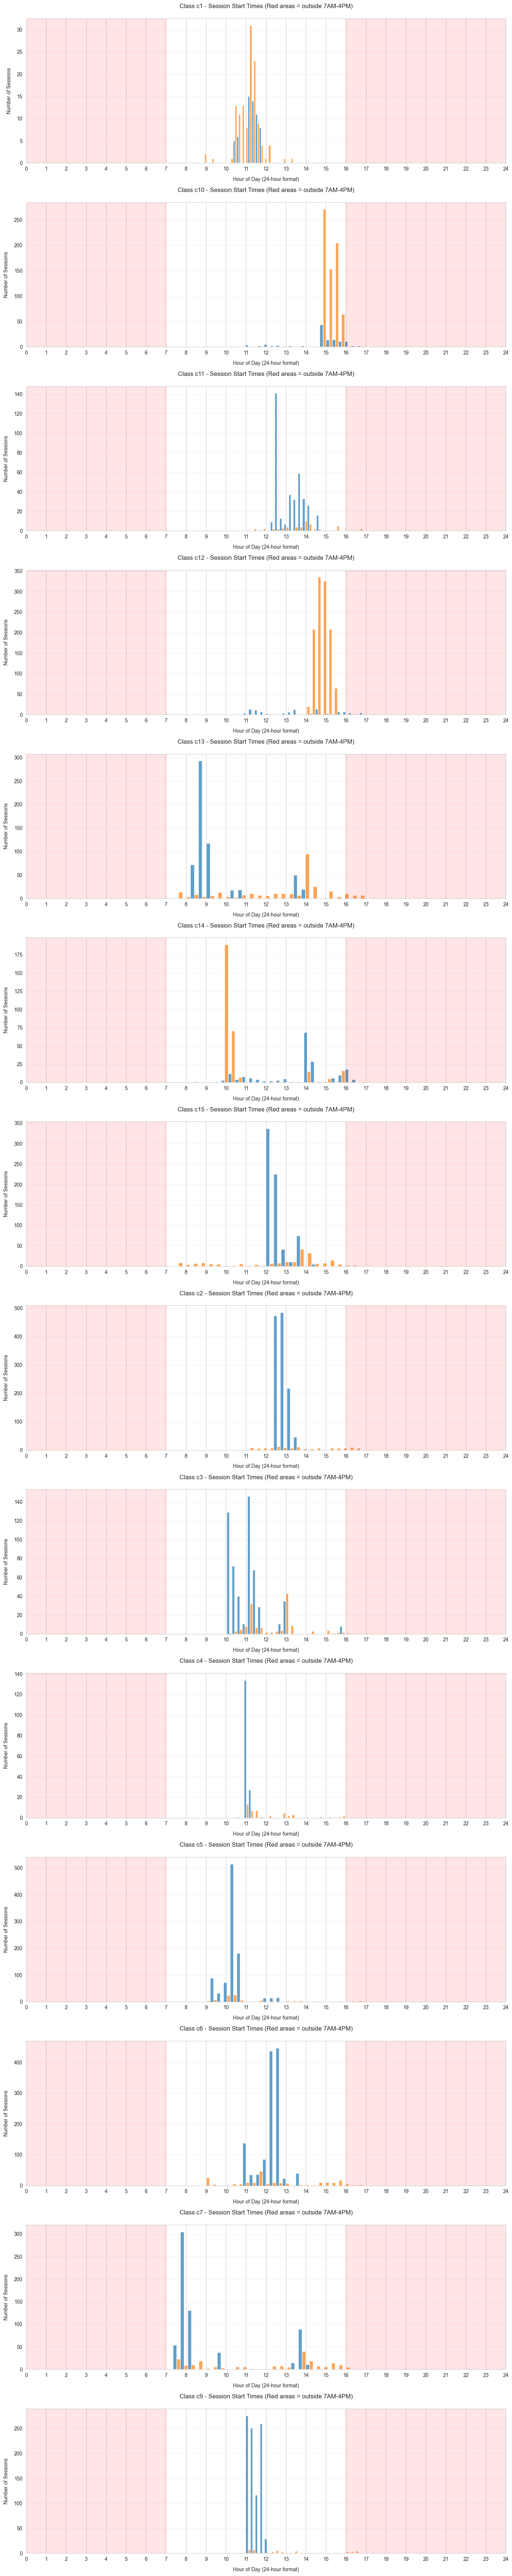

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv("original_session_level_data.csv")
df['start_time'] = pd.to_datetime(df['class_session_start_time'], format='%Y-%m-%d %H:%M:%S')
df['start_hour'] = df['start_time'].dt.hour + df['start_time'].dt.minute/60

# Filter and label session types
session_mapping = {
    'classwork': 'Classwork',
    'at school independent work': 'Independent Study'
}
filtered_df = df[df['class_session_type'].isin(session_mapping.keys())]
filtered_df['session_label'] = filtered_df['class_session_type'].map(session_mapping)

# Create plots and analyze out-of-hours sessions
classes = filtered_df['class'].unique()
plt.figure(figsize=(14, 5*len(classes)))
sns.set_style("whitegrid")

for i, class_id in enumerate(classes, 1):
    class_data = filtered_df[filtered_df['class'] == class_id]
    
    # --- Analysis ---
    print(f"\nClass {class_id} - Session Counts Outside 7AM-4PM:")
    for session_type in ['Classwork', 'Independent Study']:
        # Count sessions before 7AM or after 4PM
        out_of_hours = class_data[
            (class_data['session_label'] == session_type) & 
            ((class_data['start_hour'] < 7) | (class_data['start_hour'] > 16))
        ]
        print(f"{session_type}: {len(out_of_hours)} sessions")
    
    # --- Visualization ---
    plt.subplot(len(classes), 1, i)
    
    # Main histogram (7AM-4PM)
    sns.histplot(
        data=class_data,
        x='start_hour',
        hue='session_label',
        bins=24,
        multiple='dodge',
        palette=['#1f77b4', '#ff7f0e'],
        alpha=0.7,
        edgecolor='white',
        legend = False
    )
    
    # Highlight out-of-hours area
    plt.axvspan(0, 7, color='red', alpha=0.1)
    plt.axvspan(16, 24, color='red', alpha=0.1)
    
    plt.title(f'Class {class_id} - Session Start Times (Red areas = outside 7AM-4PM)', pad=20)
    plt.xlabel('Hour of Day (24-hour format)', labelpad=10)
    plt.ylabel('Number of Sessions', labelpad=10)
    plt.xlim(0, 24)
    plt.xticks(range(0, 25, 1))
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Total transactions in livelab: 1,642,145

Unmatched transactions (no class found): 213,194 (13.0%)
These student IDs weren't found in session data:
['s141' 's295' 's184' 's124' 's16' 's246' 's161' 's337' 's122' 's68'
 's120' 's166' 's171' 's44' 's310' 's172' 's14' 's167' 's174']

Matched transactions: 1,428,951 (should match your expected count minus unmatched)


/var/folders/bh/d4vzbc194yxb1c729qdk9r940000gn/T/ipykernel_71707/2048601861.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=class_data, x='time_bin',
/var/folders/bh/d4vzbc194yxb1c729qdk9r940000gn/T/ipykernel_71707/2048601861.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=class_data, x='time_bin',
/var/folders/bh/d4vzbc194yxb1c729qdk9r940000gn/T/ipykernel_71707/2048601861.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=class_data, x='time_bin',
/var/folders/bh/d4vzbc194yxb1c729qdk9r940000gn/T/ipykernel_71

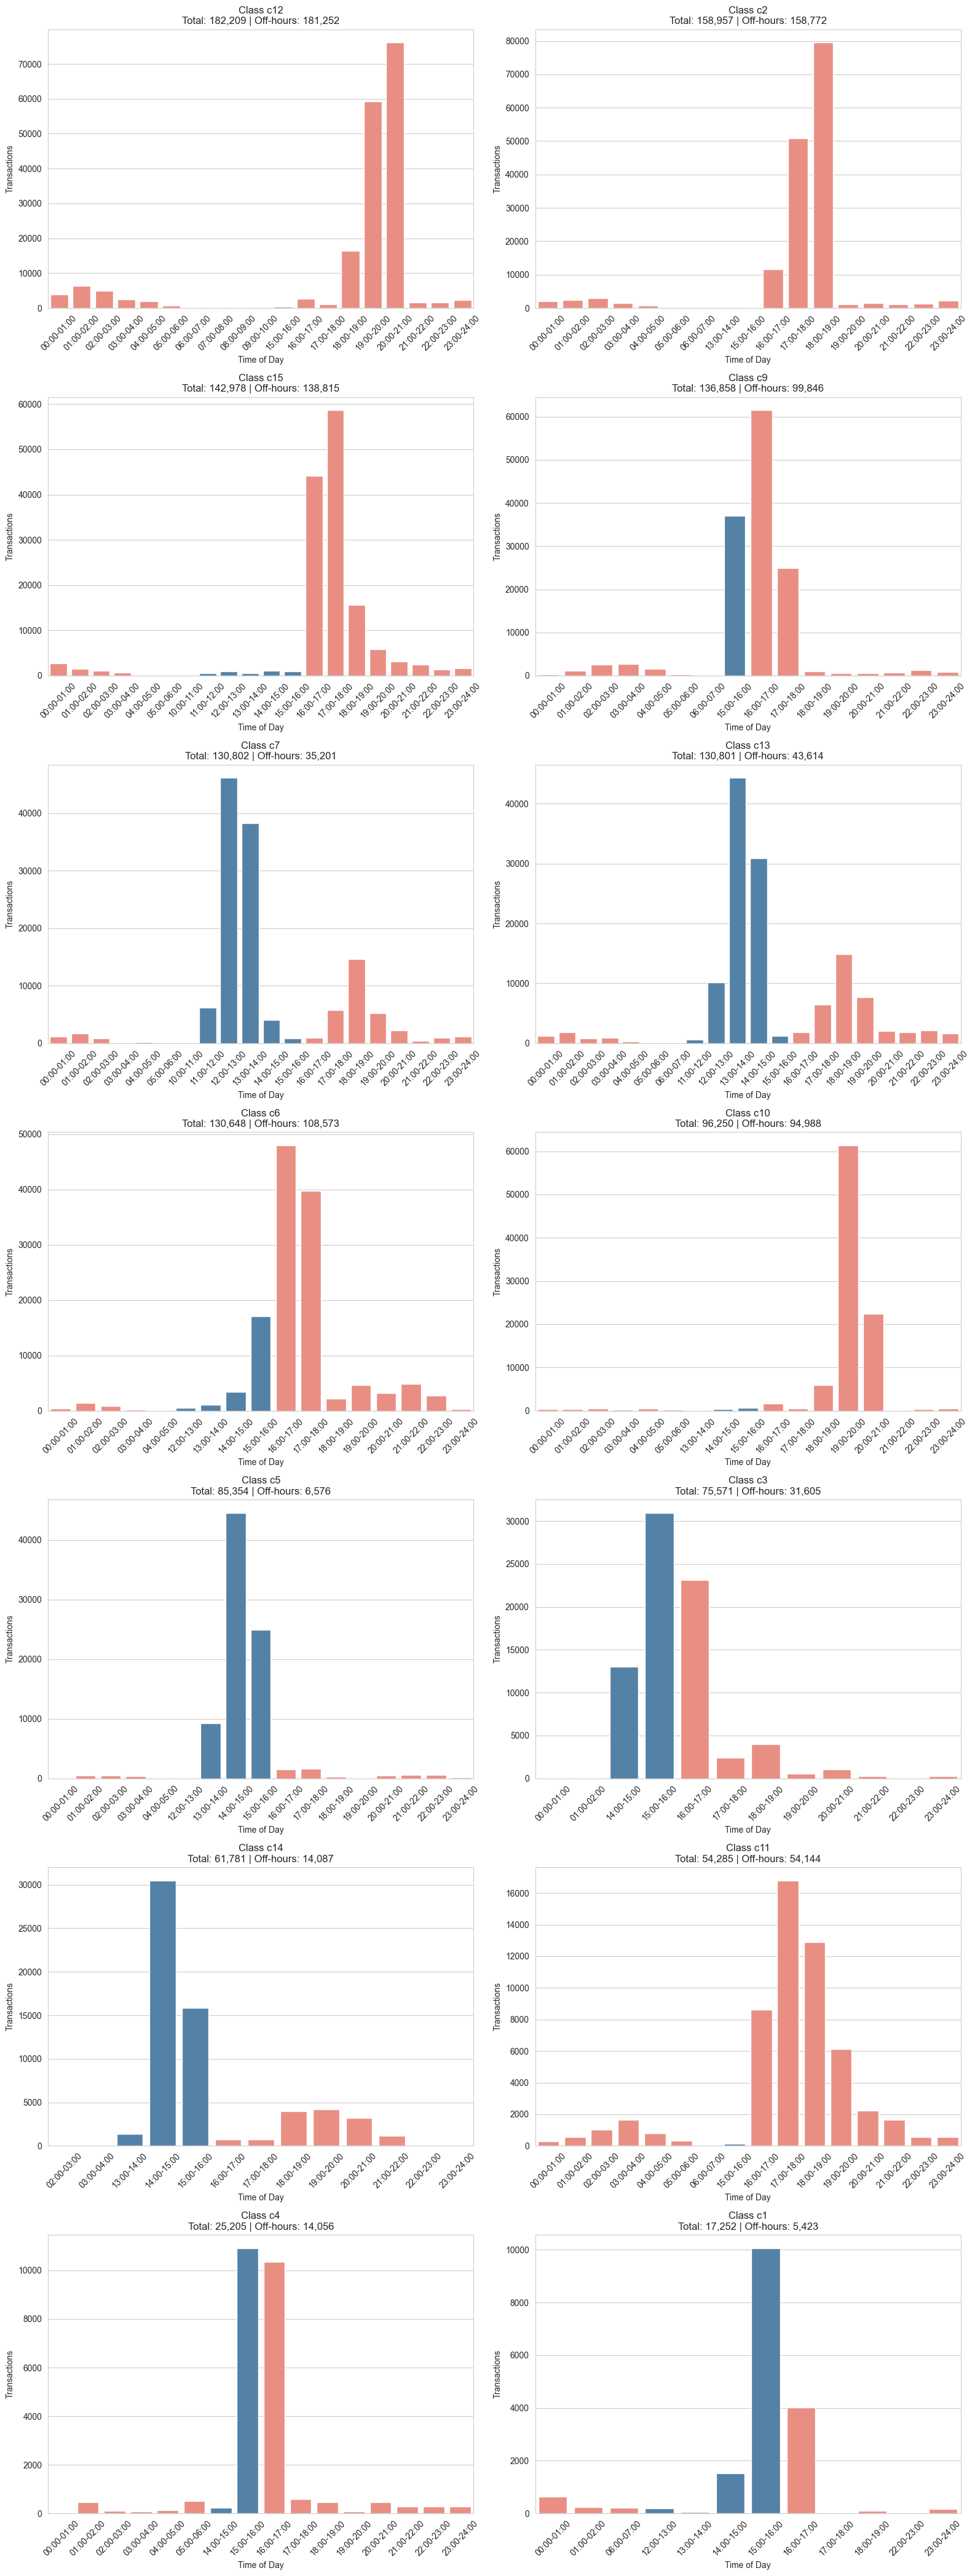


Class distribution of transactions:
class_id
c12    182209
c2     158957
c15    142978
c9     136858
c7     130802
c13    130801
c6     130648
c10     96250
c5      85354
c3      75571


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
livelab = pd.read_csv("LiveLab_with_Gaming.csv")
sessions = pd.read_csv("original_session_level_data.csv")

# Verify raw transaction count
print(f"Total transactions in livelab: {len(livelab):,}")

# Create comprehensive student-class mapping
class_mapping = sessions.groupby('anon_student_id')['class'].first().to_dict()

# Map classes to all transactions
transactions = livelab.copy()
transactions['class_id'] = transactions['Anon Student Id'].map(class_mapping)

# Check for unmatched students
unmatched = transactions[transactions['class_id'].isna()]
print(f"\nUnmatched transactions (no class found): {len(unmatched):,} ({len(unmatched)/len(livelab):.1%})")
print("These student IDs weren't found in session data:")
print(unmatched['Anon Student Id'].unique())

# Process matched transactions
transactions = transactions.dropna(subset=['class_id'])
transactions['Time'] = pd.to_datetime(transactions['Time'])
transactions['hour'] = transactions['Time'].dt.hour
transactions['time_bin'] = transactions['hour'].apply(lambda x: f"{x:02d}:00-{x+1:02d}:00")

# Verify counts
print(f"\nMatched transactions: {len(transactions):,} (should match your expected count minus unmatched)")

# Calculate off-hours (before 7AM or after 4PM)
transactions['off_hours'] = (transactions['hour'] < 7) | (transactions['hour'] >= 16)

# Get classes sorted by transaction count
classes = transactions['class_id'].value_counts().index

# Plot settings
n_cols = 2
n_rows = (len(classes) + n_cols - 1) // n_cols
plt.figure(figsize=(16, 6 * n_rows))
sns.set_style("whitegrid")

for idx, class_id in enumerate(classes):
    class_data = transactions[transactions['class_id'] == class_id]
    
    plt.subplot(n_rows, n_cols, idx + 1)
    
    # Create color mapping
    time_bins = sorted(class_data['time_bin'].unique())
    colors = ['salmon' if (int(bin[:2]) < 7 or int(bin[:2]) >= 16) else 'steelblue' for bin in time_bins]
    
    # Plot all transactions with color coding
    sns.countplot(data=class_data, x='time_bin', 
                 order=time_bins,
                 palette=colors)
    
    plt.title(f'Class {class_id}\nTotal: {len(class_data):,} | Off-hours: {class_data["off_hours"].sum():,}')
    plt.xlabel('Time of Day')
    plt.ylabel('Transactions')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Final verification
print("\nClass distribution of transactions:")
print(transactions['class_id'].value_counts().head(10).to_string())

In [3]:
import pandas as pd
from datetime import timedelta
import pytz

# Load both datasets
livelab = pd.read_csv("LiveLab_with_Gaming.csv")
sessions = pd.read_csv("original_session_level_data.csv")

# Timezone setup
utc = pytz.timezone('UTC')
est = pytz.timezone('US/Eastern')

# Convert and localize timestamps
livelab['Time'] = pd.to_datetime(livelab['Time']).dt.tz_localize(utc).dt.tz_convert(est)
sessions['student_session_start_time'] = pd.to_datetime(sessions['student_session_start_time']).dt.tz_localize(est)
sessions['student_session_end_time'] = pd.to_datetime(sessions['student_session_end_time']).dt.tz_localize(est)
sessions['class_session_start_time'] = pd.to_datetime(sessions['class_session_start_time']).dt.tz_localize(est)
sessions['class_session_end_time'] = pd.to_datetime(sessions['class_session_end_time']).dt.tz_localize(est)

# Filter helped transactions
helped_transactions = livelab[livelab['helpedTransaction'] == True].copy()

# Create student->class mapping
class_map = sessions.drop_duplicates('anon_student_id', keep='last').set_index('anon_student_id')['class'].to_dict()

# Add class info to helped transactions
helped_transactions['class_id'] = helped_transactions['Anon Student Id'].map(class_map)
helped_transactions = helped_transactions.dropna(subset=['class_id'])

# Initialize both help columns
sessions['helped_in_student_session'] = False  # Using student session timings
sessions['helped_in_class_session'] = False    # Using class session timings

# Create an index for faster lookups
sessions['session_id'] = sessions.index

# For each helped transaction, find matching sessions
for _, transaction in helped_transactions.iterrows():
    # Match using STUDENT session timings
    student_session_matches = sessions[
        (sessions['anon_student_id'] == transaction['Anon Student Id']) &
        (sessions['class'] == transaction['class_id']) &
        (sessions['student_session_start_time'] <= transaction['Time']) &
        (sessions['student_session_end_time'] >= transaction['Time'])
    ]
    sessions.loc[student_session_matches.index, 'helped_in_student_session'] = True
    
    # Match using CLASS session timings
    class_session_matches = sessions[
        (sessions['anon_student_id'] == transaction['Anon Student Id']) &
        (sessions['class'] == transaction['class_id']) &
        (sessions['class_session_start_time'] <= transaction['Time']) &
        (sessions['class_session_end_time'] >= transaction['Time'])
    ]
    sessions.loc[class_session_matches.index, 'helped_in_class_session'] = True

# Insert new columns next to each other
cols = sessions.columns.tolist()
student_help_idx = cols.index('helped_in_student_session')
cols.insert(student_help_idx + 1, cols.pop(cols.index('helped_in_class_session')))
sessions = sessions[cols]

# Save the enhanced session data
# sessions.to_csv("session_level_data_with_dual_help_columns.csv", index=False)

# Print comparison statistics
print("Help Session Comparison:")
print(f"Total sessions: {len(sessions)}")
print(f"Marked using student session timings: {sessions['helped_in_student_session'].sum()}")
print(f"Marked using class session timings: {sessions['helped_in_class_session'].sum()}")
print(f"Sessions marked differently: {(sessions['helped_in_student_session'] != sessions['helped_in_class_session']).sum()}")

# Show cases where markers differ
if (sessions['helped_in_student_session'] != sessions['helped_in_class_session']).any():
    print("\nSample rows with different markers:")
    diff_mask = sessions['helped_in_student_session'] != sessions['helped_in_class_session']
    print(sessions[diff_mask][[
        'anon_student_id', 'class', 
        'student_session_start_time', 'student_session_end_time',
        'class_session_start_time', 'class_session_end_time',
        'helped_in_student_session', 'helped_in_class_session'
    ]].head())

Help Session Comparison:
Total sessions: 12542
Marked using student session timings: 392
Marked using class session timings: 392
Sessions marked differently: 0


In [1]:
import pandas as pd
from datetime import timedelta
import pytz

livelab = pd.read_csv("LiveLab_with_Gaming.csv")
sessions = pd.read_csv("original_session_level_data.csv")

utc = pytz.timezone('UTC')
est = pytz.timezone('US/Eastern')

# Convert livelab times from UTC to EST
livelab['Time'] = pd.to_datetime(livelab['Time']).dt.tz_localize(utc).dt.tz_convert(est)

# Convert session times
sessions['student_session_start_time'] = pd.to_datetime(sessions['student_session_start_time']).dt.tz_localize(est)
sessions['student_session_end_time'] = pd.to_datetime(sessions['student_session_end_time']).dt.tz_localize(est)

# Filter helped transactions
helped_transactions = livelab[livelab['helpedTransaction'] == True].copy()

# Create student->class mapping from session data
class_map = sessions.drop_duplicates('anon_student_id', keep='last').set_index('anon_student_id')['class'].to_dict()

# Add class info to helped transactions
helped_transactions['class_id'] = helped_transactions['Anon Student Id'].map(class_map)
helped_transactions = helped_transactions.dropna(subset=['class_id'])

# Initialize new column in session data
sessions['helpedSession'] = False

# Create an index for faster lookups
sessions['session_id'] = sessions.index

# For each helped transaction, find matching sessions
for _, transaction in helped_transactions.iterrows():
    matching_sessions = sessions[
        (sessions['anon_student_id'] == transaction['Anon Student Id']) &
        (sessions['class'] == transaction['class_id']) &
        (sessions['student_session_start_time'] <= transaction['Time']) &
        (sessions['student_session_end_time'] >= transaction['Time'])
    ]
    
    sessions.loc[matching_sessions.index, 'helpedSession'] = True

# Save the enhanced session data
sessions.to_csv("session_level_data_with_help.csv", index=False)

# Print summary statistics
total_sessions = len(sessions)
helped_sessions = sessions['helpedSession'].sum()
print(f"Total sessions: {total_sessions}")
print(f"Sessions with help: {helped_sessions} ({helped_sessions/total_sessions:.1%})")

#breakdown by session type
if 'class_session_type' in sessions.columns:
    print("\nHelp by session type:")
    print(sessions.groupby('class_session_type')['helpedSession'].agg(['sum', 'count', 'mean']))

Total sessions: 12542
Sessions with help: 392 (3.1%)

Help by session type:
                            sum  count      mean
class_session_type                              
at school independent work   26   2024  0.012846
classwork                   364   9565  0.038055
homework                      2    953  0.002099


In [11]:
import pandas as pd

# Load the enhanced session data
sessions = pd.read_csv("session_level_data_with_help.csv")

# Filter for homework and independent work sessions that were helped
helped_sessions = sessions[
    (sessions['class_session_type'].isin(['classwork', 'homework', 'at school independent work'])) & 
    (sessions['helpedSession'] == True)  # Using student session timing
]

# Group by class and session type
help_distribution = helped_sessions.groupby(['class', 'class_session_type']).size().unstack(fill_value=0)

# Add totals
help_distribution['Total Helped'] = help_distribution.sum(axis=1)
help_distribution.loc['Total'] = help_distribution.sum()

# Format the results
help_distribution = help_distribution.rename(columns={
    'classwork': 'Classwork',
    'at school independent work': 'Independent Work',
    'homework': 'Homework'
})

print("Help Distribution by Class and Session Type:")
print(help_distribution.to_string())

# Optional: Calculate percentages
percentage_dist = (help_distribution.iloc[:-1,:-1].div(help_distribution.iloc[:-1,-1], axis=0)) * 100
print("\nPercentage Distribution:")
print(percentage_dist.round(1).to_string() + "%")

# Save the results
# help_distribution.to_csv("help_distribution_by_class_and_type.csv")

Help Distribution by Class and Session Type:
class_session_type  Independent Work  Classwork  Homework  Total Helped
class                                                                  
c1                                 9          2         0            11
c10                                0         14         0            14
c11                                0         35         0            35
c12                                0         33         0            33
c13                                0         43         0            43
c14                                1         11         0            12
c15                                0         37         0            37
c2                                 0         17         0            17
c3                                 0         31         1            32
c4                                 0         18         0            18
c5                                 8         25         0            33
c6                 

In [ ]:
!pip install statsmodels

In [10]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 7.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean  # Importing mean function

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data
sessions = pd.read_csv("session_level_data_with_help.csv")

sessions['helped_binary'] = sessions['helpedSession'].astype(int)

# 2. Run one-way ANOVA
model = ols('helped_binary ~ C(class_session_type)', data=sessions).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA Results:")
print(anova_table)

# 3. Post-hoc test to see WHICH groups differ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(sessions['helped_binary'],
                         sessions['class_session_type'],
                         alpha=0.05)
print("\nPairwise Comparisons:")
print(tukey)

ANOVA Results:
                           sum_sq       df          F        PR(>F)
C(class_session_type)    1.938405      2.0  32.166548  1.164020e-14
Residual               377.809641  12539.0        NaN           NaN

Pairwise Comparisons:
            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
          group1             group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------------
at school independent work classwork   0.0252    0.0  0.0153  0.0352   True
at school independent work  homework  -0.0107 0.2561 -0.0267  0.0052  False
                 classwork  homework   -0.036    0.0 -0.0498 -0.0221   True
---------------------------------------------------------------------------


In [17]:
import pandas as pd

# Load the data
sessions = pd.read_csv("session_level_data_with_help.csv")

# Convert to datetime and sort
sessions['student_session_start_time'] = pd.to_datetime(sessions['student_session_start_time'])
sessions = sessions.sort_values(['anon_student_id', 'student_session_start_time'])

# Method 1: Using transform (most robust)
sessions['prior_visits'] = (
    sessions.groupby('anon_student_id')['helpedSession']
    .transform(lambda x: x.cumsum().shift(1).fillna(0))
    .astype(int)
)

# Alternative Method 2: Using merge (if transform still causes issues)
if sessions['prior_visits'].isnull().any():
    prior_counts = (
        sessions.groupby('anon_student_id')['helped_in_student_session']
        .apply(lambda x: x.cumsum().shift(1).fillna(0))
        .reset_index()
    )
    sessions = sessions.merge(
        prior_counts, 
        on=['anon_student_id', 'level_1'], 
        how='left'
    ).rename(columns={'helped_in_student_session_y': 'prior_visits'})
    sessions['prior_visits'] = sessions['prior_visits'].fillna(0).astype(int)

# Verify results
sample_student = sessions[sessions['anon_student_id'] == sessions['anon_student_id'].iloc[0]]
print(sample_student[['anon_student_id', 'student_session_start_time', 
                     'helpedSession', 'prior_visits']].to_string())

# Save results
sessions.to_csv("session_level_data_with_help.csv", index=False)

/var/folders/bh/d4vzbc194yxb1c729qdk9r940000gn/T/ipykernel_16900/1286723180.py:7: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  sessions['student_session_start_time'] = pd.to_datetime(sessions['student_session_start_time'])


     anon_student_id student_session_start_time  helpedSession  prior_visits
7689              s1  2022-11-14 10:58:50-05:00           True             0
7698              s1  2022-11-17 11:03:47-05:00          False             1
7705              s1  2022-12-02 11:31:26-05:00          False             1
7710              s1  2022-12-07 11:34:28-05:00          False             1
7712              s1  2022-12-07 18:48:54-05:00          False             1
7715              s1  2022-12-08 20:32:03-05:00          False             1
7716              s1  2022-12-08 23:33:32-05:00          False             1
7717              s1  2022-12-09 00:03:40-05:00          False             1
7724              s1  2023-01-06 11:00:10-05:00           True             1
7755              s1  2023-01-23 11:04:30-05:00          False             2


In [26]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from scipy.stats import pointbiserialr

# Load the data
sessions = pd.read_csv("session_level_data_with_help.csv")

# Create delay groups (0 vs >0 minutes)
sessions['delayed_group'] = pd.cut(
    sessions['student_delayed_start'],
    bins=[-1, 0, float('inf')],
    labels=['OnTime', 'Delayed']
)

# 1. Basic comparison of help rates
help_rates = sessions.groupby('delayed_group')['helpedSession'].mean()
print("Help Rates by Delay Group:")
print(help_rates.round(3))

r, p = pointbiserialr(sessions['helpedSession'], 
                      sessions['student_delayed_start'])

print(f"Binary delay correlation: r = {r:.3f}, p = {p:.4f}")

# 2. Statistical test (Mann-Whitney U for non-normal distributions)
ontime = sessions[sessions['delayed_group'] == 'OnTime']['helpedSession']
delayed = sessions[sessions['delayed_group'] == 'Delayed']['helpedSession']

u_stat, p_value = stats.mannwhitneyu(ontime, delayed, alternative='two-sided')
print(f"\nMann-Whitney U Test: U={u_stat:.1f}, p={p_value:.4f}")

# 3. Effect size (Cohen's d)
def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (x.mean() - y.mean()) / np.sqrt(((nx-1)*x.std()**2 + (ny-1)*y.std()**2) / dof)

d = cohens_d(ontime, delayed)
print(f"Effect Size (Cohen's d): {d:.2f}")

sessions['is_delayed'] = (sessions['student_delayed_start'] > 0).astype(int)
r, p = pointbiserialr(sessions['helpedSession'], sessions['is_delayed'])
print(f"r = {r:.3f}, p = {p:.4f}")

Help Rates by Delay Group:
delayed_group
OnTime     0.013
Delayed    0.037
Name: helpedSession, dtype: float64
Binary delay correlation: r = -0.012, p = 0.1742

Mann-Whitney U Test: U=14325812.0, p=0.0000
Effect Size (Cohen's d): -0.14
r = 0.061, p = 0.0000


/var/folders/bh/d4vzbc194yxb1c729qdk9r940000gn/T/ipykernel_16900/3968078430.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  help_rates = sessions.groupby('delayed_group')['helpedSession'].mean()


In [5]:
import pandas as pd
from scipy.stats import pointbiserialr, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
sessions = pd.read_csv("session_level_data_with_help.csv")

# 1. Binary Analysis (0 vs >0 early stop minutes)
sessions['early_stop_group'] = pd.cut(
    sessions['student_early_stop'],
    bins=[-1, 0, float('inf')],
    labels=['OnTime', 'EarlyStop']
)

# Help rates by group
help_rates = sessions.groupby('early_stop_group')['helpedSession'].mean()
print("Help Rates by Early Stop Group:")
print(help_rates.round(3))

# Statistical test
ontime = sessions[sessions['early_stop_group'] == 'OnTime']['helpedSession']
early = sessions[sessions['early_stop_group'] == 'EarlyStop']['helpedSession']
u_stat, p_value = mannwhitneyu(ontime, early, alternative='two-sided')
print(f"\nMann-Whitney U Test: U={u_stat:.1f}, p={p_value:.4f}")

# 2. Continuous Analysis (point-biserial correlation)
r_pb, p_pb = pointbiserialr(
    sessions['helpedSession'],
    sessions['student_early_stop']
)
print(f"\nPoint-Biserial Correlation: r={r_pb:.3f}, p={p_pb:.4f}")


# Students stopping ≥5 minutes early might need targeted support
sessions['major_early_stop'] = sessions['student_early_stop'] >= 5
print(sessions.groupby('major_early_stop')['helpedSession'].mean())

Help Rates by Early Stop Group:
early_stop_group
OnTime       0.013
EarlyStop    0.037
Name: helpedSession, dtype: float64

Mann-Whitney U Test: U=14370465.5, p=0.0000

Point-Biserial Correlation: r=0.025, p=0.0050
major_early_stop
False    0.025466
True     0.041084
Name: helpedSession, dtype: float64


/var/folders/bh/d4vzbc194yxb1c729qdk9r940000gn/T/ipykernel_24306/189475036.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  help_rates = sessions.groupby('early_stop_group')['helpedSession'].mean()


/var/folders/bh/d4vzbc194yxb1c729qdk9r940000gn/T/ipykernel_39428/1359663259.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Session Type')


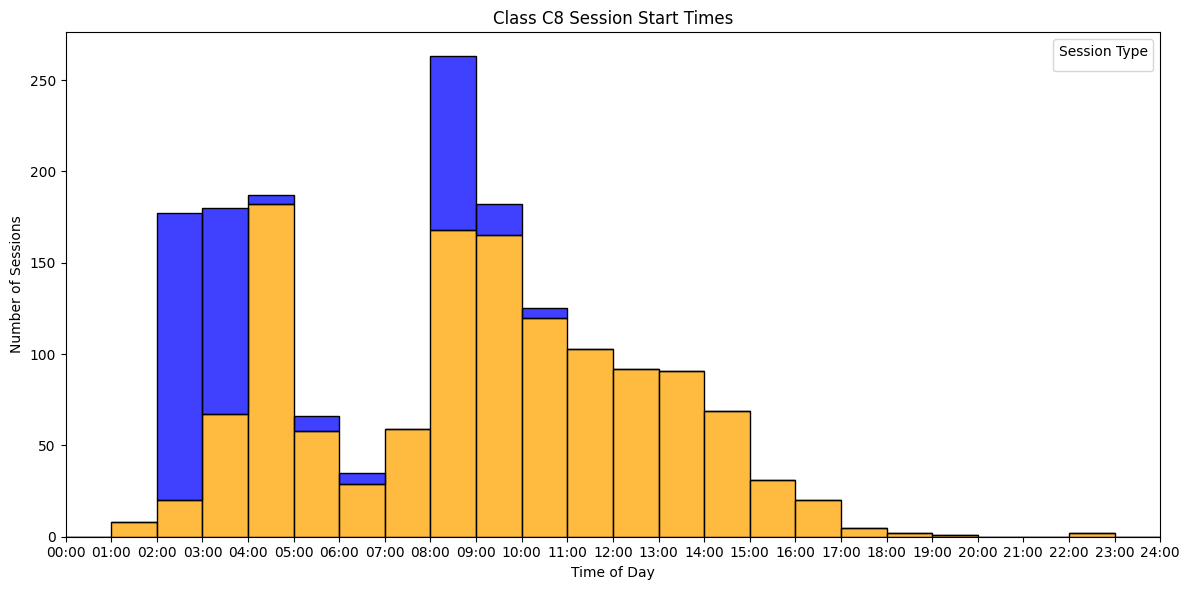

Class C8 has 1698 sessions

Breakdown by Session Type:
class_session_type
at school independent work    1292
classwork                      406
Name: count, dtype: int64

Time Distribution Summary:
count         1698
unique        1069
top       02:17:23
freq            15
Name: class_session_start_time, dtype: object


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load the data
sessions = pd.read_csv("df_tx_logs_student_session_info.csv")

# Filter for class c8 and specific session types
c8_sessions = sessions[
    (sessions['class'] == 'c8') & 
    (sessions['class_session_type'].isin(['classwork', 'at school independent work', 'homework']))
].copy()
c8_sessions['class_session_start_time'] = pd.to_datetime(c8_sessions['class_session_start_time'])

# Create a single plot
plt.figure(figsize=(12, 6))

# Create bins for every hour
bins = range(25)  # 0 through 24

# Plot histogram with 1-hour bins, colored by session type
ax = sns.histplot(data=c8_sessions, 
                 x=c8_sessions['class_session_start_time'].dt.hour + 
                   c8_sessions['class_session_start_time'].dt.minute/60,
                 bins=bins, 
                 hue='class_session_type',
                 multiple='stack',  # Stacks the bars for each type
                 palette={'classwork': 'blue', 'at school independent work': 'orange', 'homework': 'green'},
                 kde=False)

# Format x-axis to show hours:00
def time_formatter(x, pos):
    return f"{int(x):02d}:00"

ax.xaxis.set_major_formatter(FuncFormatter(time_formatter))
plt.xticks(range(25))  # Show all hours
plt.xlim(0, 24)  # Set limits to show full day

plt.title("Class C8 Session Start Times")
plt.xlabel("Time of Day")
plt.ylabel("Number of Sessions")

# Adjust legend
plt.legend(title='Session Type')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Class C8 has {len(c8_sessions)} sessions")
print("\nBreakdown by Session Type:")
print(c8_sessions['class_session_type'].value_counts())
print("\nTime Distribution Summary:")
print(c8_sessions['class_session_start_time'].dt.time.describe())

In [2]:
import pandas as pd
from datetime import timedelta
import pytz

# Load both datasets
livelab = pd.read_csv("PreHelp2_LiveLab.csv")
sessions = pd.read_csv("original_session_level_data.csv")

# Convert time columns with timezone handling
utc = pytz.timezone('UTC')
est = pytz.timezone('US/Eastern')

# Convert livelab times from UTC to EST
livelab['Time'] = pd.to_datetime(livelab['Time']).dt.tz_localize(utc).dt.tz_convert(est)

# Convert session times (already in EST)
sessions['student_session_start_time'] = pd.to_datetime(sessions['student_session_start_time']).dt.tz_localize(est)
sessions['student_session_end_time'] = pd.to_datetime(sessions['student_session_end_time']).dt.tz_localize(est)

# Filter helped transactions
helped_transactions = livelab[livelab['helpedTransaction'] == True].copy()

# Create student->class mapping from session data
class_map = sessions.drop_duplicates('anon_student_id', keep='last').set_index('anon_student_id')['class'].to_dict()

# Add class info to helped transactions
helped_transactions['class_id'] = helped_transactions['Anon Student Id'].map(class_map)
helped_transactions = helped_transactions.dropna(subset=['class_id'])

# Initialize new column in session data
sessions['helpedSession'] = False

# Create an index for faster lookups
sessions['session_id'] = sessions.index

# For each helped transaction, find matching sessions
for _, transaction in helped_transactions.iterrows():
    matching_sessions = sessions[
        (sessions['anon_student_id'] == transaction['Anon Student Id']) &
        (sessions['class'] == transaction['class_id']) &
        (sessions['student_session_start_time'] <= transaction['Time']) &
        (sessions['student_session_end_time'] >= transaction['Time'])
    ]
    
    sessions.loc[matching_sessions.index, 'helpedSession'] = True

# Save the enhanced session data
sessions.to_csv("session_level_data_with_prehelp.csv", index=False)

# Print summary statistics
total_sessions = len(sessions)
helped_sessions = sessions['helpedSession'].sum()
print(f"Total sessions: {total_sessions}")
print(f"Sessions with help: {helped_sessions} ({helped_sessions/total_sessions:.1%})")

#breakdown by session type
if 'class_session_type' in sessions.columns:
    print("\nHelp by session type:")
    print(sessions.groupby('class_session_type')['helpedSession'].agg(['sum', 'count', 'mean']))

Total sessions: 12542
Sessions with help: 329 (2.6%)

Help by session type:
                            sum  count      mean
class_session_type                              
at school independent work   20   2024  0.009881
classwork                   309   9565  0.032305
homework                      0    953  0.000000


In [2]:
import pandas as pd

# Load both datasets
session_level = pd.read_csv("session_level_data_with_help.csv")
session_detectors = pd.read_csv("session_detector_presence_by_student.csv")

# List of detector columns to add
detector_cols = ['Idle', 'Struggle', 'System Misuse', 'Student Doing Well']

# Merge on common identifiers (adjust based on your actual columns)
merged_data = pd.merge(
    session_level,
    session_detectors[['anon_student_id', 'class', 'class_session_start_time'] + detector_cols],
    on=['anon_student_id', 'class', 'class_session_start_time'],
    how='left'  # Keeps all session_level rows even if no match in detectors
)

# Verify the merge
print(f"Original rows: {len(session_level)}")
print(f"Merged rows: {len(merged_data)}")
print("New columns added:", detector_cols)

merged_data.to_csv("session_level_data_with_help.csv", index=False)
print("Merge completed and saved!")

Original rows: 12542
Merged rows: 12542
New columns added: ['Idle', 'Struggle', 'System Misuse', 'Student Doing Well']
Merge completed and saved!


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("session_level_data_with_help.csv")

df = df[df['class_session_type'] != 'homework'] 

# Group by student and intervention status
paired_df = df.groupby(['anon_student_id', 'helpedSession'])['student_delayed_start'].median().unstack()

# Keep only students with BOTH helped=True and helped=False
paired_df = paired_df.dropna()
print(f"Students with both conditions (non-homework): {len(paired_df)}")

# Extract paired samples
delayed_helped = paired_df[True] 
delayed_unhelped = paired_df[False]

stat, p = wilcoxon(delayed_helped, delayed_unhelped)
print(f"Wilcoxon Statistic: {stat}, p-value: {p:.4f}")

df['is_delayed'] = df['student_delayed_start'] > 0 

# Group by student and delay status, then compute median help rate
paired_help = df.groupby(['anon_student_id', 'is_delayed'])['helpedSession'].mean().unstack()

# Drop students without both delayed and on-time sessions
paired_help = paired_help.dropna()

# Calculate PS: Probability delayed session has higher help rate than on-time
diff = paired_help[True] - paired_help[False]
ps = (np.mean(diff > 0) + 0.5 * np.mean(diff == 0))  # Accounts for ties
print(f"\nProbability delayed sessions get more help: {ps:.2f}")

# Interpretation
# PS (prob of superiority) indicates that higher delayed start times lead to high chance of receiving help
# also p-value < 0.05, so statistically significant difference between student_delayed_start between 
# sessions where students received help vs when they did not 


Students with both conditions (non-homework): 182
Wilcoxon Statistic: 6820.5, p-value: 0.0450

Probability delayed sessions get more help: 0.70


In [15]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("session_level_data_with_help.csv")

# Aggregate early_stop by student and help status (using median)
paired_df = df.groupby(['anon_student_id', 'helpedSession'])['student_early_stop'].median().unstack()

# Drop students missing either True or False
paired_df = paired_df.dropna()
print(f"Students with both conditions: {len(paired_df)}")

# Extract paired samples
early_stop_helped = paired_df[True]
early_stop_unhelped = paired_df[False]

stat, p = wilcoxon(early_stop_helped, early_stop_unhelped)
print(f"Wilcoxon Statistic: {stat}, p-value: {p:.4f}")

# PS
diff = early_stop_helped - early_stop_unhelped
ps = np.mean(diff > 0) + 0.5 * np.mean(diff == 0)
print(f"\nProbability helped session has higher early_stop: {ps:.2f}")

Students with both conditions: 184
Wilcoxon Statistic: 3488.0, p-value: 0.0000

Probability helped session has higher early_stop: 0.73


In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

session_level_dataset = pd.read_csv("session_level_data_with_help.csv")

# 1. Force convert dependent variable to 0/1
session_level_dataset['helpedSession'] = session_level_dataset['helpedSession'].astype(int)

session_level_dataset = session_level_dataset[session_level_dataset['class_session_type'] != 'homework']

# 2. Create crossed random effects ID
session_level_dataset['crossed_id'] = (
    session_level_dataset['class'].astype(str) + "_" + 
    session_level_dataset['anon_student_id'].astype(str)
)

session_level_dataset = session_level_dataset[session_level_dataset['class_session_type'] != 'homework']

# 3. Ensure categorical variables are properly encoded
session_level_dataset['Struggle'] = pd.Categorical(session_level_dataset['Struggle'])
session_level_dataset['class_session_type'] = pd.Categorical(
    session_level_dataset['class_session_type'],
    categories=["classwork", "at school independent work"]
)

# 4. Fit the model
glmm = smf.mixedlm(
    "helpedSession ~ prior_visits + C(Struggle) + student_delayed_start + C(class_session_type)",
    groups=session_level_dataset["crossed_id"],
    data=session_level_dataset
).fit()

# 5. View results
print(glmm.summary())

                            Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            helpedSession
No. Observations:              11589              Method:                        REML         
No. Groups:                    338                Scale:                         0.0317       
Min. group size:               1                  Log-Likelihood:                3451.5881    
Max. group size:               95                 Converged:                     Yes          
Mean group size:               34.3                                                           
----------------------------------------------------------------------------------------------
                                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------
Intercept                                            0.029    0.005  6.138 0.00

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

session_level_dataset = pd.read_csv("session_level_data_with_help.csv")

session_level_dataset['helpedSession'] = session_level_dataset['helpedSession'].astype(int)

session_level_dataset = session_level_dataset[session_level_dataset['class_session_type'] != 'homework']

# nested structure equivalent to (1|class/student)
session_level_dataset['class_student_id'] = (
    session_level_dataset['class'].astype(str) + "_" + 
    session_level_dataset['anon_student_id'].astype(str)
)

session_level_dataset['Struggle'] = pd.Categorical(session_level_dataset['Struggle'])
session_level_dataset['class_session_type'] = pd.Categorical(
    session_level_dataset['class_session_type'],
    categories=["classwork", "at school independent work"]
)

glmm = smf.mixedlm(
    "helpedSession ~ prior_visits + C(Struggle) + student_delayed_start + C(class_session_type)",
    groups=session_level_dataset["class_student_id"],
    data=session_level_dataset
).fit()

print(glmm.summary())

                            Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            helpedSession
No. Observations:              11589              Method:                        REML         
No. Groups:                    338                Scale:                         0.0317       
Min. group size:               1                  Log-Likelihood:                3451.5881    
Max. group size:               95                 Converged:                     Yes          
Mean group size:               34.3                                                           
----------------------------------------------------------------------------------------------
                                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------
Intercept                                            0.029    0.005  6.138 0.00

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [19]:
from scipy import stats

struggle_numeric = session_level_dataset['Struggle'].astype(int)

# point-biserial correlation
correlation, p_value = stats.pointbiserialr(struggle_numeric, session_level_dataset['student_delayed_start'])
print(f"Point-biserial correlation: {correlation:.4f}, p-value: {p_value:.4f}")

Point-biserial correlation: -0.1736, p-value: 0.0000


In [20]:
import pandas as pd
from scipy import stats
import numpy as np

# Function to create paired data and perform Wilcoxon signed-rank test
def analyze_with_wilcoxon(data, group_name):
    print(f"\n=== ANALYSIS FOR {group_name} ===")
    
    # Compute mean delayed start by student and help status
    student_means = data.groupby(['anon_student_id', 'helpedSession'])['student_delayed_start'].mean().reset_index()
    
    # Reshape to wide format for paired analysis
    student_wide = student_means.pivot(index='anon_student_id', 
                                      columns='helpedSession', 
                                      values='student_delayed_start')
    
    # Drop students without both types of sessions
    paired_data = student_wide.dropna()
    
    print(f"Number of students with both helped and non-helped sessions: {len(paired_data)}")
    
    # Extract paired values
    helped_delays = paired_data[1]  # Column 1 = helped sessions
    not_helped_delays = paired_data[0]  # Column 0 = not helped sessions
    
    print(f"Mean delayed start when helped: {helped_delays.mean():.2f} minutes")
    print(f"Mean delayed start when not helped: {not_helped_delays.mean():.2f} minutes")
    
    # Perform Wilcoxon signed-rank test
    statistic, p_value = stats.wilcoxon(helped_delays, not_helped_delays)
    
    print(f"Wilcoxon signed-rank test: T={statistic}, p={p_value:.4f}")
    
    # Analyze effect direction
    differences = helped_delays - not_helped_delays
    positive_diffs = sum(differences > 0)
    negative_diffs = sum(differences < 0)
    zero_diffs = sum(differences == 0)
    
    if helped_delays.mean() > not_helped_delays.mean():
        print("Interpretation: Within students, delayed start times tend to be HIGHER when they receive help")
    else:
        print("Interpretation: Within students, delayed start times tend to be LOWER when they receive help")
    
    return statistic, p_value, differences

# Apply the Wilcoxon analysis with integer filtering for Struggle
struggling_data = session_level_dataset[session_level_dataset['Struggle'] == 1]
struggling_results = analyze_with_wilcoxon(struggling_data, "STRUGGLING STUDENTS (Struggle = 1)")

non_struggling_data = session_level_dataset[session_level_dataset['Struggle'] == 0]
non_struggling_results = analyze_with_wilcoxon(non_struggling_data, "NON-STRUGGLING STUDENTS (Struggle = 0)")


=== ANALYSIS FOR STRUGGLING STUDENTS (Struggle = 1) ===
Number of students with both helped and non-helped sessions: 168
Mean delayed start when helped: 5.69 minutes
Mean delayed start when not helped: 6.07 minutes
Wilcoxon signed-rank test: T=4271.0, p=0.0000
Interpretation: Within students, delayed start times tend to be LOWER when they receive help

=== ANALYSIS FOR NON-STRUGGLING STUDENTS (Struggle = 0) ===
Number of students with both helped and non-helped sessions: 37
Mean delayed start when helped: 9.91 minutes
Mean delayed start when not helped: 10.49 minutes
Wilcoxon signed-rank test: T=304.0, p=0.4828
Interpretation: Within students, delayed start times tend to be LOWER when they receive help
